In [1]:
#Autores: Alejandro Cohen, Andrea Islas y María de Lourdes Martínez
#Importamos las librerias necesarias
import pandas as pd
import pandasql as ps
import time 
import numpy as np
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### <span style="color:maroon">MISTER MASCOTAS</span>

In [2]:
#Creamos un DF vacio
aux_1=pd.DataFrame()

In [3]:
#Convertimos el DF a un archivo de excel ".xlsx"
aux_1.to_excel("df_mister.xlsx",index=False)

#Verificamos que se haya creado el archivo en la misma carpeta en donde está este código

In [4]:
#Función que recibe como parámetro la variable "alimento"
#En el caso de esta tienda tuvimos que definir 2 funciones ya que para obtener el producto "alimento"
#la url cambiaba, además de que los productos se dividian en 2 urls distintas
def Buscador_Precios_Mister_Alimento(producto):
    
    #1.INGRESAMOS A LA PÁGINA WEB
    #Primer página url
    path ="/Users/Universidad/Downloads/1.Manejo de Datos/Webdriver3/chromedriver"
    driver=webdriver.Chrome(path)
    url= "https://www.mistermascotas.com.mx/collections/"+producto+"-para-perro"
    driver.get(url)
    
    #2.ACCEDEMOS A LOS ELEMENTOS QUE CONTIENEN LOS DATOS QUE QUEREMOS DE LA PÁGINA WEB
    productos= driver.find_elements_by_class_name("product-grid-item")
    
    #3.ACCEDEMOS A LAS URL'S ALMACENADAS EN LA VARIABLE PRODUCTOS
    #Para obtener varios url´s de jalón ocupamos un ciclo for
    #Declaramos una lista vacía
    lista_urls=list()
    #Para cada una de los productos hasta la longitud de la lista:
    for i in range(len(productos)):
        try:
            #En cada una de las entradas se va a buscar la etiqueta "a" y el atributo "href"
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            #En caso de error se va a agregar a la lista un registro NaN
            lista_urls.append(np.nan)
    
    #4.ACCEDEMOS A LOS NOMBRES ALMACENADAS EN LA VARIABLE PRODUCTOS
    #Ahora hacemos lo mismo pero para obtener los NOMBRES
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)  
        except:
            lista_nombres.append(np.nan)
            
    #5.ACCEDEMOS A LOS PRECIOS BASE Y PROMO EN LA VARIABLE PRODUCTOS
    #En el caso de este autoservicio hay una manera de obtener el precio con y sin descuento en la misma consulta 
    #de una clase, por lo cual sólo obtenemos una lista de precios
    #Fer me permitió hacer esto ya que había problemitas cuando obteniamos por separado las listas con y sin descuento
    lista_precios=list()

    for i in range(len(productos)):

        try:
            lista_precios.append(productos[i].find_elements_by_class_name("money")[0].text)
        #Manadará NaN cuando el producto esté agotado
        except:
            lista_precios.append(np.nan)
    
    #6.CREAR DATAFRAME A PARTIR DE LOS DATOS OBTENIDOS
    #Creamos el DataFrame
    df_mister =pd.DataFrame({"Nombre_producto":lista_nombres,
                             "Producto":producto,
                             "Precios_de_lista":lista_precios,
                             "url":lista_urls})

    #A través de la librería "time" se pone la fecha asociada al día en el que se hace la extracción de la información
    df_mister["Fecha_de_consulta"]= time.strftime("%d/%m/%y")
    
    #Colocamos el nombre del autoservicio de manera manual en el DF
    df_mister["Autoservicio"]="Mister Mascotas"
    
    #Para reacomodar las columnas del DF según el las especificaciones del proyecto final
    df_mister = df_mister[["Fecha_de_consulta","Autoservicio","Producto","Nombre_producto","Precios_de_lista","url"]]
    
    #7.ESCRIBIR SOBRE EXCEL
    #Convertimos el excel en un DF
    datos_webscraper=pd.read_excel("df_mister.xlsx")

    #Concatenamos el DF "vacío" con el DF de Mister Mascotas con el que estuvimos trabajando
    datos_webscraper= pd.concat([datos_webscraper,df_mister],axis=0)

    #Finalmente convertimos de nuevo el DF en un archivo excel con el mismo nombre
    datos_webscraper.to_excel("df_mister.xlsx",index=False)
#—————————————————————————————————————————————————————————————————————————————————————————————————————————————————————   
    #1.INGRESAMOS A LA PÁGINA WEB
    #segunda página url
    path ="/Users/Universidad/Downloads/1.Manejo de Datos/Webdriver3/chromedriver"
    driver=webdriver.Chrome(path)
    url= "https://www.mistermascotas.com.mx/collections/"+producto+"-para-perro?page=2"
    driver.get(url)
    
    #2.ACCEDEMOS A LOS ELEMENTOS QUE CONTIENEN LOS DATOS QUE QUEREMOS DE LA PÁGINA WEB
    productos= driver.find_elements_by_class_name("product-grid-item")
    
    #3.ACCEDEMOS A LAS URL'S ALMACENADAS EN LA VARIABLE PRODUCTOS
    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    
    #4.ACCEDEMOS A LOS NOMBRES ALMACENADAS EN LA VARIABLE PRODUCTOS
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)  #los nombres están en el 3er lugar
        except:
            lista_nombres.append(np.nan)
            
    #5.ACCEDEMOS A LOS PRECIOS BASE Y PROMO EN LA VARIABLE PRODUCTOS
    lista_precios=list()

    for i in range(len(productos)):

        try:
            lista_precios.append(productos[i].find_elements_by_class_name("money")[0].text)

        except:
            lista_precios.append(np.nan)
    
    #6.CREAR DATAFRAME A PARTIR DE LOS DATOS OBTENIDOS
    df_mister =pd.DataFrame({"Nombre_producto":lista_nombres,
                             "Producto":producto,
                             "Precios_de_lista":lista_precios,
                             "url":lista_urls})

    df_mister["Fecha_de_consulta"]= time.strftime("%d/%m/%y")

    df_mister["Autoservicio"]="Mister Mascotas"
    
    df_mister = df_mister[["Fecha_de_consulta","Autoservicio","Producto","Nombre_producto","Precios_de_lista","url"]]
    
    #7.ESCRIBIR SOBRE EXCEL
    datos_webscraper=pd.read_excel("df_mister.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_mister],axis=0)

    datos_webscraper.to_excel("df_mister.xlsx",index=False)
    
    
    #8.SALIR DEL DRIVER
    #Para salir del driver (cerrar ventana de chrome con la que estámos trabajando)
    driver.quit()
    #Al final se regresa el DF de Mister Mascotas
    return df_mister

#Para cada producto que esté en la lista se va a llamar a la función
#Para esta función sólo jalará cuando se coloque "alimento"
for productos in ["alimento"]:
    Buscador_Precios_Mister_Alimento(productos)
    


<ipython-input-4-ef3c7a5b9451>:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-4-ef3c7a5b9451>:14: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("product-grid-item")
/Users/Universidad/opt/anaconda3/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
/Users/Universidad/opt/anaconda3/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
/Users/Universidad/opt/anaconda3/lib/python3.8/site-pa

In [5]:
#Función que recibe como parámetro el producto de interés
#Totalmente análogo a la función anterior
def Buscador_Precios_Mister_Mascotas(producto):
    
    #1.INGRESAMOS A LA PÁGINA WEB
    path ="/Users/Universidad/Downloads/1.Manejo de Datos/Webdriver3/chromedriver"
    driver=webdriver.Chrome(path)
    url= "https://www.mistermascotas.com.mx/collections/"+producto+"-para-perros"
    driver.get(url)
    
    #2.ACCEDEMOS A LOS ELEMENTOS QUE CONTIENEN LOS DATOS QUE QUEREMOS DE LA PÁGINA WEB
    productos= driver.find_elements_by_class_name("product-grid-item")
    
    #3.ACCEDEMOS A LAS URL'S ALMACENADAS EN LA VARIABLE PRODUCTOS
    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    
    #4.ACCEDEMOS A LOS NOMBRES ALMACENADAS EN LA VARIABLE PRODUCTOS
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)  #los nombres están en el 3er lugar
        except:
            lista_nombres.append(np.nan)
            
    #5.ACCEDEMOS A LOS PRECIOS BASE Y PROMO EN LA VARIABLE PRODUCTOS
    lista_precios=list()

    for i in range(len(productos)):

        try:
            lista_precios.append(productos[i].find_elements_by_class_name("money")[0].text)

        except:
            lista_precios.append(np.nan)
    
    #6.CREAR DATAFRAME A PARTIR DE LOS DATOS OBTENIDOS
    df_mister =pd.DataFrame({"Nombre_producto":lista_nombres,
                             "Producto":producto,
                             "Precios_de_lista":lista_precios,
                             "url":lista_urls})

    df_mister["Fecha_de_consulta"]= time.strftime("%d/%m/%y")

    df_mister["Autoservicio"]="Mister Mascotas"
    
    df_mister = df_mister[["Fecha_de_consulta","Autoservicio","Producto","Nombre_producto","Precios_de_lista","url"]]
    
    #7.ESCRIBIR SOBRE EXCEL
    datos_webscraper=pd.read_excel("df_mister.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_mister],axis=0)

    datos_webscraper.to_excel("df_mister.xlsx",index=False)
    
    #8.SALIR DEL DRIVER
    driver.quit()
    return df_mister

#Para esta función sí se pueden obtener otros productos para perros, además de "camas" y "juguetes"
for productos in ["camas","juguetes"]:
    Buscador_Precios_Mister_Mascotas(productos)
    
#Se lee la hoja de cálculo de excel
df_mister=pd.read_excel("df_mister.xlsx")
df_mister  

<ipython-input-5-b8a3e85116f2>:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-5-b8a3e85116f2>:12: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("product-grid-item")


,Fecha_de_consulta,Autoservicio,Producto,Nombre_producto,Precios_de_lista,url
0,27/01/22,Mister Mascotas,alimento,Royal Canin Urinary SO - Alimento para Perro,"$ 1,949",https://www.mistermascotas.com.mx/collections/...
1,27/01/22,Mister Mascotas,alimento,Royal Canin Gastro Intestinal Low Fat - Alimen...,"$ 1,997",https://www.mistermascotas.com.mx/collections/...
2,27/01/22,Mister Mascotas,alimento,ProPlan HA Hydrolyzed - Alimento para Perro Ve...,"$ 1,629",https://www.mistermascotas.com.mx/collections/...
3,27/01/22,Mister Mascotas,alimento,Royal Canin Renal Support S - Alimento para Perro,"$ 1,429",https://www.mistermascotas.com.mx/collections/...
4,27/01/22,Mister Mascotas,alimento,ProPlan NF Kidney Function - Alimento para Per...,"$ 1,429",https://www.mistermascotas.com.mx/collections/...
...,...,...,...,...,...,...
151,27/01/22,Mister Mascotas,juguetes,Kong Juguete para Perro Palo para Morder y Lanzar,$ 249,https://www.mistermascotas.com.mx/collections/...
152,27/01/22,Mister Mascotas,juguetes,Peluche para Perro Kong Dragón Wild Knots,$ 349,https://www.mistermascotas.com.mx/collections/...
153,27/01/22,Mister Mascotas,juguetes,Hueso de Juguete para Perro Kong,$ 179,https://www.mistermascotas.com.mx/collections/...
154,27/01/22,Mister Mascotas,juguetes,Juguete Disco Volador Classic Flyer Kong,$ 289,https://www.mistermascotas.com.mx/collections/...


In [6]:
#PRECIOS (CADENAS) A FLOATS

#Recibe todos los registros del DF 
def precios_floats_1(datos):

    #Eliminamos el signo en los precios
    
    #1ª columna
    for i in range(len(datos["Precios_de_lista"])):
        try:
            datos["Precios_de_lista"].iloc[i]=datos["Precios_de_lista"].iloc[i].strip("$")
        except:
            pass
          
    #Quitamos la separación de comas para miles
    datos["Precios_de_lista"]=datos["Precios_de_lista"].replace(",","",regex=True)
   
    #Convertimos los precios a numéricos    
    datos['Precios_de_lista'] = pd.to_numeric(datos['Precios_de_lista'], errors='coerce')

    datos.to_excel("df_mister_limpio.xlsx",index=False)
        
    #Visualizamos los tipos de datos
    print(datos.dtypes)
    return datos

#Verificamos que el DF ahora cuente con precios de tipo float
precios_floats_1(df_mister)

df_mister=pd.read_excel("df_mister_limpio.xlsx")
df_mister

Fecha_de_consulta     object
Autoservicio          object
Producto              object
Nombre_producto       object
Precios_de_lista     float64
url                   object
dtype: object


,Fecha_de_consulta,Autoservicio,Producto,Nombre_producto,Precios_de_lista,url
0,27/01/22,Mister Mascotas,alimento,Royal Canin Urinary SO - Alimento para Perro,1949.0,https://www.mistermascotas.com.mx/collections/...
1,27/01/22,Mister Mascotas,alimento,Royal Canin Gastro Intestinal Low Fat - Alimen...,1997.0,https://www.mistermascotas.com.mx/collections/...
2,27/01/22,Mister Mascotas,alimento,ProPlan HA Hydrolyzed - Alimento para Perro Ve...,1629.0,https://www.mistermascotas.com.mx/collections/...
3,27/01/22,Mister Mascotas,alimento,Royal Canin Renal Support S - Alimento para Perro,1429.0,https://www.mistermascotas.com.mx/collections/...
4,27/01/22,Mister Mascotas,alimento,ProPlan NF Kidney Function - Alimento para Per...,1429.0,https://www.mistermascotas.com.mx/collections/...
...,...,...,...,...,...,...
151,27/01/22,Mister Mascotas,juguetes,Kong Juguete para Perro Palo para Morder y Lanzar,249.0,https://www.mistermascotas.com.mx/collections/...
152,27/01/22,Mister Mascotas,juguetes,Peluche para Perro Kong Dragón Wild Knots,349.0,https://www.mistermascotas.com.mx/collections/...
153,27/01/22,Mister Mascotas,juguetes,Hueso de Juguete para Perro Kong,179.0,https://www.mistermascotas.com.mx/collections/...
154,27/01/22,Mister Mascotas,juguetes,Juguete Disco Volador Classic Flyer Kong,289.0,https://www.mistermascotas.com.mx/collections/...


### <span style="color:maroon">WALMART</span>

In [7]:
#Nos apoyamos de una variable aux para creear la hoja de cálculo en la misma dirección que el programa 
aux_2 = pd.DataFrame()
aux_2.to_excel("df_walmart.xlsx",index=False)

In [8]:
def Buscador_Precios_Selenium_Walmart(producto):  
    #Primero definimos a path con la ruta de acceso de chromedriver en nuestra máquina
    path = "/Users/Universidad/Downloads/1.Manejo de Datos/Webdriver3/chromedriver"
    driver = webdriver.Chrome(path)
    
    #Ingresamos a la página que queremos y copiamos el link de ella
    URL = "https://www.walmart.com.mx/productos?Ntt="+producto
    #Así podemos usar nuestro driver en ella
    driver.get(URL)
    
    #Accedemos a los elementos que contienen los datos de la página que queremos con ayuda del webdriver

    productos= driver.find_elements_by_class_name("grid_product__30OQa")
    
    #Ahora accedemos a los URLS almacenados en productos, para ello creamos una lista vacía
    #Iteramos en el rango de la página, en el caso de Walmart la pagína muestra 48 productos para así agregar los URL's de
    # los productos a la lista lurls
    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    #Entonces vamos a acceder a los nombres de los productos almacenados en productos, creamos otra lista vacía
    #Iteramos de nuevo en el rango de la página y agregamos los nombres de los productos en la lista lnombres
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)
        except:
            lista_nombres.append(np.nan)
    #Por últio vamos a acceder a los precios de los productos almacenados en productos, hacemos 
    #dos listas, ya que hay precios con promoción
    #Iteramos por último en el rango de la página y agregamos los precios en la lista lprecios, mientras que los 
    #precios que disminuyen por alguna promoción se agregarán a lpromos
    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("product_price__2NBjj")[0].text.split("\n")[0])
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("product_price__2NBjj")[0].text.split("\n")[1])
        except:
            lista_promos.append(np.nan)
    #Programamos el encabezado de la hoja de excel y el llenado de está         
    df_walmart =pd.DataFrame({"Nombre_producto":lista_nombres,
                              "Producto":producto,
                              "url":lista_urls,
                              "Precios_de_lista":lista_precios,
                              "Precios_en_promoción":lista_promos})
   
    df_walmart["Fecha_de_consulta"]= time.strftime("%d/%m/%y")
    
    df_walmart["Autoservicio"]="Walmart"

    df_walmart = df_walmart[["Fecha_de_consulta","Autoservicio","Producto","Nombre_producto","Precios_de_lista","Precios_en_promoción","url"]]
    
    df_walmart=df_walmart.reset_index(drop=True)

    datos_webscraper=pd.read_excel("df_walmart.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_walmart],axis=0)

    datos_webscraper.to_excel("df_walmart.xlsx",index=False)

    driver.quit()
    return df_walmart

#Colocamos los productos que queremos "exportar"
for productos in ["croquetas para perro","camas para perro","juguetes para perro"]:
    Buscador_Precios_Selenium_Walmart(productos)

#Se lee la hoja de cálculo de excel
df_walmart=pd.read_excel("df_walmart.xlsx")
df_walmart

<ipython-input-8-d2190203ad89>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)
<ipython-input-8-d2190203ad89>:13: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("grid_product__30OQa")
/Users/Universidad/opt/anaconda3/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
/Users/Universidad/opt/anaconda3/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
/Users/Universidad/opt/anaconda3/lib/python3.8/sit

,Fecha_de_consulta,Autoservicio,Producto,Nombre_producto,Precios_de_lista,Precios_en_promoción,url
0,27/01/22,Walmart,croquetas para perro,Alimento para perro Purina Beneful Cachorro P...,$669.00,$559.00,https://www.walmart.com.mx/mascotas/perros/ali...
1,27/01/22,Walmart,croquetas para perro,Alimento para Perro Beneful Minis Salmón Adul...,$559.00,$499.00,https://www.walmart.com.mx/mascotas/perros/ali...
2,27/01/22,Walmart,croquetas para perro,Alimento para perro Beneful minis para adulto...,$189.00,$149.00,https://www.walmart.com.mx/mascotas/perros/ali...
3,27/01/22,Walmart,croquetas para perro,Alimento para Perros Purina Dog Chow Sin Colo...,$959.00,$899.00,https://www.walmart.com.mx/mascotas/perros/ali...
4,27/01/22,Walmart,croquetas para perro,Alimento para Perros Purina Dog Chow Sin Colo...,$959.00,$899.00,https://www.walmart.com.mx/mascotas/perros/ali...
...,...,...,...,...,...,...,...
139,27/01/22,Walmart,juguetes para perro,Juguetes para perros de peluche chillones jug...,$202.70,Envío internacional,https://www.walmart.com.mx/mascotas/perros/jug...
140,27/01/22,Walmart,juguetes para perro,Juguetes para masticar perros para masticador...,$452.09,Envío internacional,https://www.walmart.com.mx/mascotas/perros/jug...
141,27/01/22,Walmart,juguetes para perro,Juguetes para Perros chirriantes para mastica...,$349.29,Envío internacional,https://www.walmart.com.mx/mascotas/perros/jug...
142,27/01/22,Walmart,juguetes para perro,Juguetes para perros para masticadores agresi...,$624.99,Envío internacional,https://www.walmart.com.mx/mascotas/perros/jug...


In [9]:
#PRECIOS (CADENAS) A FLOATS
def precios_floats_2(datos): 
    #Hacemos un iterador en la primera columna para quitar el signo de pesos en la columna "Precios_de_lista"
    for i in range(len(datos["Precios_de_lista"])):
        try:
            datos["Precios_de_lista"].iloc[i]=datos["Precios_de_lista"].iloc[i].strip("$")
        except:
            pass
    
    #Y hacemos un iterador pero en la segunda columna que es la de "Precio_en_promoción"
    for i in range(len(datos["Precios_en_promoción"])):
        try:
            datos["Precios_en_promoción"].iloc[i]=datos["Precios_en_promoción"].iloc[i].strip("$")
        except:
            pass
        
    #Quitamos la separacion de comas para miles de la siguiente manera
    datos["Precios_de_lista"] = datos["Precios_de_lista"].replace(",","",regex=True)
    datos["Precios_en_promoción"]=datos["Precios_en_promoción"].replace(",","",regex=True)
        
    #Convertimos los precios a valores numéricos    
    datos['Precios_de_lista'] = pd.to_numeric(datos['Precios_de_lista'], errors='coerce')
    datos['Precios_en_promoción'] = pd.to_numeric(datos['Precios_en_promoción'], errors='coerce')

    datos.to_excel("df_walmart_limpio.xlsx",index=False)
        
    #Visualizamos los tipos de datos
    print(datos.dtypes)
    return datos


precios_floats_2(df_walmart)

df_walmart=pd.read_excel("df_walmart_limpio.xlsx")
df_walmart

Fecha_de_consulta        object
Autoservicio             object
Producto                 object
Nombre_producto          object
Precios_de_lista        float64
Precios_en_promoción    float64
url                      object
dtype: object


,Fecha_de_consulta,Autoservicio,Producto,Nombre_producto,Precios_de_lista,Precios_en_promoción,url
0,27/01/22,Walmart,croquetas para perro,Alimento para perro Purina Beneful Cachorro P...,669.00,559.0,https://www.walmart.com.mx/mascotas/perros/ali...
1,27/01/22,Walmart,croquetas para perro,Alimento para Perro Beneful Minis Salmón Adul...,559.00,499.0,https://www.walmart.com.mx/mascotas/perros/ali...
2,27/01/22,Walmart,croquetas para perro,Alimento para perro Beneful minis para adulto...,189.00,149.0,https://www.walmart.com.mx/mascotas/perros/ali...
3,27/01/22,Walmart,croquetas para perro,Alimento para Perros Purina Dog Chow Sin Colo...,959.00,899.0,https://www.walmart.com.mx/mascotas/perros/ali...
4,27/01/22,Walmart,croquetas para perro,Alimento para Perros Purina Dog Chow Sin Colo...,959.00,899.0,https://www.walmart.com.mx/mascotas/perros/ali...
...,...,...,...,...,...,...,...
139,27/01/22,Walmart,juguetes para perro,Juguetes para perros de peluche chillones jug...,202.70,NaN,https://www.walmart.com.mx/mascotas/perros/jug...
140,27/01/22,Walmart,juguetes para perro,Juguetes para masticar perros para masticador...,452.09,NaN,https://www.walmart.com.mx/mascotas/perros/jug...
141,27/01/22,Walmart,juguetes para perro,Juguetes para Perros chirriantes para mastica...,349.29,NaN,https://www.walmart.com.mx/mascotas/perros/jug...
142,27/01/22,Walmart,juguetes para perro,Juguetes para perros para masticadores agresi...,624.99,NaN,https://www.walmart.com.mx/mascotas/perros/jug...


### <span style="color:maroon">MISCOTA</span>

In [10]:
#Creamos un DF vacio
aux_3=pd.DataFrame()

In [11]:
#Convertimos el DF a un archivo de excel ".xlsx"
aux_3.to_excel("df_miscota.xlsx",index=False)

In [12]:
#FUNCIÓN COMPLETA

#Función que recibe como parámetro el producto de interés
def Buscador_Precios_Miscota(producto):

    #1.INGRESAMOS A LA PÁGINA WEB
    path ="/Users/Universidad/Downloads/1.Manejo de Datos/Webdriver3/chromedriver"
    driver=webdriver.Chrome(path)
    url= "https://mx.miscota.com/perros/c_"+producto
    driver.get(url)
    
    #2.ACCEDEMOS A LOS ELEMENTOS QUE CONTIENEN LOS DATOS QUE QUEREMOS DE LA PÁGINA WEB
    productos= driver.find_elements_by_class_name("prod__box")
    
    #3.ACCEDEMOS A LAS URL'S ALMACENADAS EN LA VARIABLE PRODUCTOS
    #Para obtener varios url´s de jalón ocupamos un ciclo for
    #Declaramos una lista vacía
    lista_urls=list()
    #Para cada una de los productos hasta la longitud de la lista:
    for i in range(len(productos)):
        try:
            #En cada una de las entradas se va a buscar la etiqueta "a" y el atributo "href"
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            #En caso de error se va a agregar a la lista un registro NaN
            lista_urls.append(np.nan)
    
    #4.ACCEDEMOS A LOS NOMBRES ALMACENADAS EN LA VARIABLE PRODUCTOS
    #Ahora hacemos lo mismo pero para obtener los NOMBRES
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[0].text)
            #lista_nombres.append(productos[i].find_elements_by_class_name("a")[0].text)
        except:
            lista_nombres.append(np.nan)
            
    #5.ACCEDEMOS A LOS PRECIOS BASE Y PROMO EN LA VARIABLE PRODUCTOS
    lista_precios=list()

    for i in range(len(productos)):

        try:
            lista_precios.append(productos[i].find_elements_by_class_name("prod__box--price")[0].text.split("\n")[0])

        except:
            lista_precios.append(np.nan)
            
    #6.CREAR DATAFRAME A PARTIR DE LOS DATOS OBTENIDOS
    #Creamos el DataFrame
    #Los precios los tomamos como están actualmente en la página. algunos con descuentos y otros sin
    #Así nos dejo entregarlo Fer debido a que había un problema al obetener los precios con y sin descuento por separado
    df_miscota =pd.DataFrame({"Nombre_producto":lista_nombres,
                             "Producto":producto,
                             "Precios_de_lista":lista_precios,
                             "url":lista_urls})

    #A través de la librería "time" se pone la fecha asociada al día en el que se hace la extracción de la información
    df_miscota["Fecha_de_consulta"]= time.strftime("%d/%m/%y")

    df_miscota["Autoservicio"]="Miscota"
    
    #Para reacomodar las columnas del DF
    df_miscota = df_miscota[["Fecha_de_consulta","Autoservicio","Producto","Nombre_producto","Precios_de_lista","url"]]
    
    #7.ESCRIBIR SOBRE EXCEL
    #Convertimos el excel en un DF
    datos_webscraper=pd.read_excel("df_miscota.xlsx")

    #Concatenamos el DF "vacío" con el DF de Miscota con el que estuvimos trabajando
    datos_webscraper= pd.concat([datos_webscraper,df_miscota],axis=0)

    #Finalmente convertimos de nuevo el DF en un archivo excel con el mismo nombre
    datos_webscraper.to_excel("df_miscota.xlsx",index=False)
    
    #8.SALIR DEL DRIVER
    #Para salir del driver (cerrar ventana de chrome con la que estámos trabajando)
    driver.quit()
    #Al final se regresa el DF de Mister Mascotas
    return df_miscota

#Para cada función que esté en la lista se va a llamar a la función
for productos in ["comida","descanso","juguetes-deporte"]:
    Buscador_Precios_Miscota(productos)
    
#Se lee la hoja de cálculo de excel
df_miscota=pd.read_excel("df_miscota.xlsx")
df_miscota

<ipython-input-12-8244e71930b1>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-12-8244e71930b1>:13: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("prod__box")
/Users/Universidad/opt/anaconda3/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
/Users/Universidad/opt/anaconda3/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
/Users/Universidad/opt/anaconda3/lib/python3.8/site-packages

,Fecha_de_consulta,Autoservicio,Producto,Nombre_producto,Precios_de_lista,url
0,27/01/22,Miscota,comida,GREENCARE NUTRITION Hypoallergenic 3 Kg,$380,https://mx.miscota.com/perros/greencare-nutrit...
1,27/01/22,Miscota,comida,HANTU Adult Pollo y Arroz,$309,https://mx.miscota.com/perros/hantu/p-423683
2,27/01/22,Miscota,comida,GRATURE Adult Light Pavo,$142,https://mx.miscota.com/perros/grature/adult-pa...
3,27/01/22,Miscota,comida,TRAVENESS Comida Húmeda para Perros de Pollo c...,$47,https://mx.miscota.com/perros/traveness/p-428485
4,27/01/22,Miscota,comida,TRAVENESS Pienso Natural Grain Free Receta de ...,$380,https://mx.miscota.com/perros/traveness/pienso...
...,...,...,...,...,...,...
126,27/01/22,Miscota,juguetes-deporte,TRIXIE DentaFun Pelota Mentolada Caucho Natura...,$95,https://mx.miscota.com/perros/trixie/dentafun-...
127,27/01/22,Miscota,juguetes-deporte,"TRIXIE DentaFun Rugby, menta, caucho 11 cm",$145,https://mx.miscota.com/perros/trixie/dentafun-...
128,27/01/22,Miscota,juguetes-deporte,"TRIXIE Pelota suave, caucho blando, flotante",$45,https://mx.miscota.com/perros/trixie/pelota-su...
129,27/01/22,Miscota,juguetes-deporte,TRIXIE Cocodrilo Látex con Sonido 33 cm,$216,https://mx.miscota.com/perros/trixie/cocodrilo...


In [13]:
#PRECIOS (CADENAS) A FLOATS
#Recibe todos los registros del DF 
def precios_floats_3(datos):

    #Eliminamos el signo en los precios
    
    #1ª columna
    for i in range(len(datos["Precios_de_lista"])):
        try:
            datos["Precios_de_lista"].iloc[i]=datos["Precios_de_lista"].iloc[i].strip("$")
        except:
            pass
          
    #Quitamos la separación de comas para miles
    datos["Precios_de_lista"]=datos["Precios_de_lista"].replace(",","",regex=True)
    
   
    #Convertimos los precios a numéricos    
    datos['Precios_de_lista'] = pd.to_numeric(datos['Precios_de_lista'], errors='coerce')

    datos.to_excel("df_miscota_float.xlsx",index=False)
        
    #Visualizamos los tipos de datos
    print(datos.dtypes)
    return datos

#Verificamos que el DF ahora cuente con precios de tipo float
precios_floats_3(df_miscota)

df_miscota=pd.read_excel("df_miscota_float.xlsx")
df_miscota

Fecha_de_consulta     object
Autoservicio          object
Producto              object
Nombre_producto       object
Precios_de_lista     float64
url                   object
dtype: object


,Fecha_de_consulta,Autoservicio,Producto,Nombre_producto,Precios_de_lista,url
0,27/01/22,Miscota,comida,GREENCARE NUTRITION Hypoallergenic 3 Kg,380.0,https://mx.miscota.com/perros/greencare-nutrit...
1,27/01/22,Miscota,comida,HANTU Adult Pollo y Arroz,309.0,https://mx.miscota.com/perros/hantu/p-423683
2,27/01/22,Miscota,comida,GRATURE Adult Light Pavo,142.0,https://mx.miscota.com/perros/grature/adult-pa...
3,27/01/22,Miscota,comida,TRAVENESS Comida Húmeda para Perros de Pollo c...,47.0,https://mx.miscota.com/perros/traveness/p-428485
4,27/01/22,Miscota,comida,TRAVENESS Pienso Natural Grain Free Receta de ...,380.0,https://mx.miscota.com/perros/traveness/pienso...
...,...,...,...,...,...,...
126,27/01/22,Miscota,juguetes-deporte,TRIXIE DentaFun Pelota Mentolada Caucho Natura...,95.0,https://mx.miscota.com/perros/trixie/dentafun-...
127,27/01/22,Miscota,juguetes-deporte,"TRIXIE DentaFun Rugby, menta, caucho 11 cm",145.0,https://mx.miscota.com/perros/trixie/dentafun-...
128,27/01/22,Miscota,juguetes-deporte,"TRIXIE Pelota suave, caucho blando, flotante",45.0,https://mx.miscota.com/perros/trixie/pelota-su...
129,27/01/22,Miscota,juguetes-deporte,TRIXIE Cocodrilo Látex con Sonido 33 cm,216.0,https://mx.miscota.com/perros/trixie/cocodrilo...


In [14]:
#ELIMINAMOS LAS FILAS CON DATOS VACÍOS
df_miscota = df_miscota[df_miscota['Nombre_producto'].notna()]
print(df_miscota)

    Fecha_de_consulta Autoservicio          Producto  \
0            27/01/22      Miscota            comida   
1            27/01/22      Miscota            comida   
2            27/01/22      Miscota            comida   
3            27/01/22      Miscota            comida   
4            27/01/22      Miscota            comida   
..                ...          ...               ...   
126          27/01/22      Miscota  juguetes-deporte   
127          27/01/22      Miscota  juguetes-deporte   
128          27/01/22      Miscota  juguetes-deporte   
129          27/01/22      Miscota  juguetes-deporte   
130          27/01/22      Miscota  juguetes-deporte   

                                       Nombre_producto  Precios_de_lista  \
0              GREENCARE NUTRITION Hypoallergenic 3 Kg             380.0   
1                            HANTU Adult Pollo y Arroz             309.0   
2                             GRATURE Adult Light Pavo             142.0   
3    TRAVENESS Comida H

In [15]:
#Reseteamos el índice de la tabla para cada vez que se corra el código antes de que se agregue al Excel
df_miscota=df_miscota.reset_index(drop=True)

In [16]:
#Creamos un DF vacio
aux_4=pd.DataFrame()

#Convertimos el DF a un archivo de excel ".xlsx"
aux_4.to_excel("df_miscota_limpio.xlsx",index=False)

#Finalmente convertimos de nuevo el DF en un archivo excel con el mismo nombre
df_miscota.to_excel("df_miscota_limpio.xlsx",index=False)

In [17]:
df_miscota

,Fecha_de_consulta,Autoservicio,Producto,Nombre_producto,Precios_de_lista,url
0,27/01/22,Miscota,comida,GREENCARE NUTRITION Hypoallergenic 3 Kg,380.0,https://mx.miscota.com/perros/greencare-nutrit...
1,27/01/22,Miscota,comida,HANTU Adult Pollo y Arroz,309.0,https://mx.miscota.com/perros/hantu/p-423683
2,27/01/22,Miscota,comida,GRATURE Adult Light Pavo,142.0,https://mx.miscota.com/perros/grature/adult-pa...
3,27/01/22,Miscota,comida,TRAVENESS Comida Húmeda para Perros de Pollo c...,47.0,https://mx.miscota.com/perros/traveness/p-428485
4,27/01/22,Miscota,comida,TRAVENESS Pienso Natural Grain Free Receta de ...,380.0,https://mx.miscota.com/perros/traveness/pienso...
...,...,...,...,...,...,...
70,27/01/22,Miscota,juguetes-deporte,TRIXIE DentaFun Pelota Mentolada Caucho Natura...,95.0,https://mx.miscota.com/perros/trixie/dentafun-...
71,27/01/22,Miscota,juguetes-deporte,"TRIXIE DentaFun Rugby, menta, caucho 11 cm",145.0,https://mx.miscota.com/perros/trixie/dentafun-...
72,27/01/22,Miscota,juguetes-deporte,"TRIXIE Pelota suave, caucho blando, flotante",45.0,https://mx.miscota.com/perros/trixie/pelota-su...
73,27/01/22,Miscota,juguetes-deporte,TRIXIE Cocodrilo Látex con Sonido 33 cm,216.0,https://mx.miscota.com/perros/trixie/cocodrilo...


## <span style="color:maroon">Juntamos todos los DF en el mismo archivo excel</span>

In [18]:
#Creamos un DF vacio
df_completo=pd.DataFrame()

#Convertimos el DF a un archivo de excel ".xlsx"
df_completo.to_excel("df_completo.xlsx",index=False)

In [19]:
#Concatenamos los DF "vacío" con el DF vacío que acabamos de crear
df_completo= pd.concat([df_completo,df_mister,df_walmart,df_miscota],axis=0)

In [20]:
df_completo

,Fecha_de_consulta,Autoservicio,Producto,Nombre_producto,Precios_de_lista,url,Precios_en_promoción
0,27/01/22,Mister Mascotas,alimento,Royal Canin Urinary SO - Alimento para Perro,1949.0,https://www.mistermascotas.com.mx/collections/...,NaN
1,27/01/22,Mister Mascotas,alimento,Royal Canin Gastro Intestinal Low Fat - Alimen...,1997.0,https://www.mistermascotas.com.mx/collections/...,NaN
2,27/01/22,Mister Mascotas,alimento,ProPlan HA Hydrolyzed - Alimento para Perro Ve...,1629.0,https://www.mistermascotas.com.mx/collections/...,NaN
3,27/01/22,Mister Mascotas,alimento,Royal Canin Renal Support S - Alimento para Perro,1429.0,https://www.mistermascotas.com.mx/collections/...,NaN
4,27/01/22,Mister Mascotas,alimento,ProPlan NF Kidney Function - Alimento para Per...,1429.0,https://www.mistermascotas.com.mx/collections/...,NaN
...,...,...,...,...,...,...,...
70,27/01/22,Miscota,juguetes-deporte,TRIXIE DentaFun Pelota Mentolada Caucho Natura...,95.0,https://mx.miscota.com/perros/trixie/dentafun-...,NaN
71,27/01/22,Miscota,juguetes-deporte,"TRIXIE DentaFun Rugby, menta, caucho 11 cm",145.0,https://mx.miscota.com/perros/trixie/dentafun-...,NaN
72,27/01/22,Miscota,juguetes-deporte,"TRIXIE Pelota suave, caucho blando, flotante",45.0,https://mx.miscota.com/perros/trixie/pelota-su...,NaN
73,27/01/22,Miscota,juguetes-deporte,TRIXIE Cocodrilo Látex con Sonido 33 cm,216.0,https://mx.miscota.com/perros/trixie/cocodrilo...,NaN


In [21]:
df_completo.to_excel("df_completo.xlsx",index=False)

## <span style="color:maroon">CONSULTAS SQL</span>

In [114]:
#1.Consultar todos los datos del DF
consulta_1=ps.sqldf("select * from df_completo")

In [125]:
consulta_1

,Fecha_de_consulta,Autoservicio,Producto,Nombre_producto,Precios_de_lista,url,Precios_en_promoción
0,27/01/22,Mister Mascotas,alimento,Royal Canin Urinary SO - Alimento para Perro,1949.0,https://www.mistermascotas.com.mx/collections/...,NaN
1,27/01/22,Mister Mascotas,alimento,Royal Canin Gastro Intestinal Low Fat - Alimen...,1997.0,https://www.mistermascotas.com.mx/collections/...,NaN
2,27/01/22,Mister Mascotas,alimento,ProPlan HA Hydrolyzed - Alimento para Perro Ve...,1629.0,https://www.mistermascotas.com.mx/collections/...,NaN
3,27/01/22,Mister Mascotas,alimento,Royal Canin Renal Support S - Alimento para Perro,1429.0,https://www.mistermascotas.com.mx/collections/...,NaN
4,27/01/22,Mister Mascotas,alimento,ProPlan NF Kidney Function - Alimento para Per...,1429.0,https://www.mistermascotas.com.mx/collections/...,NaN
...,...,...,...,...,...,...,...
370,27/01/22,Miscota,juguetes-deporte,TRIXIE DentaFun Pelota Mentolada Caucho Natura...,95.0,https://mx.miscota.com/perros/trixie/dentafun-...,NaN
371,27/01/22,Miscota,juguetes-deporte,"TRIXIE DentaFun Rugby, menta, caucho 11 cm",145.0,https://mx.miscota.com/perros/trixie/dentafun-...,NaN
372,27/01/22,Miscota,juguetes-deporte,"TRIXIE Pelota suave, caucho blando, flotante",45.0,https://mx.miscota.com/perros/trixie/pelota-su...,NaN
373,27/01/22,Miscota,juguetes-deporte,TRIXIE Cocodrilo Látex con Sonido 33 cm,216.0,https://mx.miscota.com/perros/trixie/cocodrilo...,NaN


In [116]:
#2.Consultar el costo promedio de los alimentos en cada autoservicio
consulta_2=ps.sqldf("select autoservicio,producto,avg(precios_de_lista) as precio_promedio from df_completo group by autoservicio")


In [126]:
consulta_2

,Autoservicio,Producto,precio_promedio
0,Miscota,comida,274.724147
1,Mister Mascotas,alimento,880.992806
2,Walmart,croquetas para perro,693.679097


In [118]:
#3.Consultar el costo promedio de todos los productos en cada autoservicio
consulta_3=ps.sqldf("select Autoservicio,Producto,avg(Precios_de_lista) as Precio_promedio from df_completo group by Producto order by Autoservicio")

In [127]:
consulta_3

,Autoservicio,Producto,Precio_promedio
0,Miscota,comida,275.197160
1,Miscota,descanso,385.375280
2,Miscota,juguetes-deporte,163.600000
3,Mister Mascotas,alimento,1258.328767
4,Mister Mascotas,camas,689.457143
5,Mister Mascotas,juguetes,208.677419
6,Walmart,camas para perro,945.208333
7,Walmart,croquetas para perro,835.389167
8,Walmart,juguetes para perro,300.439792


In [120]:
#4.Consultar el número de productos que hay en cada autoservicio
consulta_4=ps.sqldf("select Autoservicio,Producto,count(Producto) as Cantidad_de_productos from df_completo group by Producto order by Autoservicio")

In [128]:
consulta_4

,Autoservicio,Producto,Cantidad_de_productos
0,Miscota,comida,25
1,Miscota,descanso,25
2,Miscota,juguetes-deporte,25
3,Mister Mascotas,alimento,89
4,Mister Mascotas,camas,36
5,Mister Mascotas,juguetes,31
6,Walmart,camas para perro,48
7,Walmart,croquetas para perro,48
8,Walmart,juguetes para perro,48


In [122]:
#5.Consultar los productos agotados y dentro de que autoservicio se encuentran
consulta_5=ps.sqldf("select Autoservicio,Producto,Nombre_producto from df_completo where Precios_de_lista is null")

In [124]:
consulta_5

,Autoservicio,Producto,Nombre_producto
0,Mister Mascotas,alimento,Royal Canin Mature Consult Small Dog - Aliment...
1,Mister Mascotas,alimento,Hills l/d Liver Care 8 Kg Cuidado del Hígado -...
2,Mister Mascotas,alimento,Royal Canin Adulto Raza Mediana y Grande - Ali...
3,Mister Mascotas,alimento,ProSeries Cordero y Arroz - Alimento para Perro
4,Mister Mascotas,alimento,Royal Canin Adult Large Dog 12 Kg - Alimento p...
5,Mister Mascotas,alimento,Alimento Para Perro Lata Royal Canin POS Wet A...
6,Mister Mascotas,alimento,Lata Royal Canin Adulto 385 g (Caja) - Aliment...
7,Mister Mascotas,alimento,Lata Hills j/d Prescription Diet 370 g - Alime...
8,Mister Mascotas,alimento,Lata Hills k/d Kidney Canine 370 Gr. Cuidado R...
9,Mister Mascotas,alimento,Royal Canin Bulldog Frances Adulto 2.72 Kg - C...


In [129]:
#6.Consultar los alimentos para perro que son más caros(con precio mayores a $2,000) y dónde los podemos encontrar
consulta_6=ps.sqldf(
"select Autoservicio,Nombre_producto,Precios_de_lista from df_completo where (Producto='alimento' or Producto='comida'or Producto='croqeutas para perro') and (Precios_de_lista>2000)")

In [130]:
consulta_6

,Autoservicio,Nombre_producto,Precios_de_lista
0,Mister Mascotas,Hills c/d Multicare Cuidado Urinario - Aliment...,2349.0
1,Mister Mascotas,Hills k/d Kidney Care Prescription Diet - Alim...,2047.0
2,Mister Mascotas,Hills Joint Care j/d - Alimento para Perro,2185.0
3,Mister Mascotas,Hills u/d Urinary Care - Alimento para Perro,2185.0
4,Mister Mascotas,Hills W/d Digestive /Weight Glucose Management...,2047.0
5,Mister Mascotas,Royal Canin Starter - Alimento Perro Cachorro ...,2159.0
6,Mister Mascotas,Hills Derm Dense Alergias Ambientales - Alimen...,2199.0
7,Mister Mascotas,Hill's r/d Weight Reduction - Alimento para Perro,2047.0
8,Mister Mascotas,Royal Canin Bulldog Adulto 13.6 Kg - Alimento ...,2099.0
9,Mister Mascotas,Hills Adulto Razas Grandes 15.9 Kg - Alimento ...,2159.0


In [131]:
#7.Consultar el número de camas de color gris que hay en cada autoservicio (Para fines personales de una integrante)
consulta_7=ps.sqldf(
"select Autoservicio,Nombre_producto from df_completo where (Producto='descanso' or Producto like '%camas%') and (Nombre_producto like '%gris%')")

In [132]:
consulta_7

,Autoservicio,Nombre_producto
0,Mister Mascotas,Cama para Perro Rojo Interior Gris
1,Mister Mascotas,Cama para Perro Cafe Interior Gris
2,Mister Mascotas,Cama para Perro Morado Interior Gris
3,Mister Mascotas,Cama para Perro Negro Interior Gris
4,Mister Mascotas,Cama para Perro Turqueza Interior Gris
5,Mister Mascotas,Cama para Perro Naranja Interior Gris
6,Mister Mascotas,Cama para Perro Marrón Interior Gris
7,Mister Mascotas,Cama para Perro Fucsia Interior Gris
8,Mister Mascotas,Cama para Perro Camel Interior Gris
9,Mister Mascotas,Cama para Perro Azul Marino Interior Gris


In [133]:
#8.Consultar juguetes de la marca "Kong" ordenados de menor a mayor según su precio
consulta_8=ps.sqldf(
"select Nombre_producto,Precios_de_lista,url from df_completo where Nombre_producto like '%kong%' order by Precios_de_lista")

In [134]:
consulta_8

,Nombre_producto,Precios_de_lista,url
0,Pelota de Tenis para Perros Kong,97.0,https://www.mistermascotas.com.mx/collections/...
1,KONG Dr.Noys Dog Duckie,103.0,https://mx.miscota.com/perros/kong/dr-noys-dog...
2,Pelota para Perros Kong Duramax,109.0,https://www.mistermascotas.com.mx/collections/...
3,Crema de Camote para Perros Kong,127.0,https://www.mistermascotas.com.mx/collections/...
4,Vaca de Juguete para Perro con Sonido Wiggi Kong,134.0,https://www.mistermascotas.com.mx/collections/...
5,KONG Puppy,137.0,https://mx.miscota.com/perros/kong/p-146981
6,Jirafa de Juguete para Perro con Sonido Wiggi ...,139.0,https://www.mistermascotas.com.mx/collections/...
7,KONG Juguete Squeez Jels,140.0,https://mx.miscota.com/perros/kong/p-129671
8,KONG Classic Rojo,147.0,https://mx.miscota.com/perros/kong/classic-red
9,Peluches para Perros Kong Wild Knots Oso,149.0,https://www.mistermascotas.com.mx/collections/...


In [135]:
#9.Consultar pelotas ordenados de mayor a menor según su precio
consulta_9=ps.sqldf(
"select Nombre_producto,Precios_de_lista,url from df_completo where Nombre_producto like '%pelota%' order by Precios_de_lista")

In [136]:
consulta_9

,Nombre_producto,Precios_de_lista,url
0,"TRIXIE Pelota suave, caucho blando, flotante",45.0,https://mx.miscota.com/perros/trixie/pelota-su...
1,TRIXIE DentaFun Pelota Mentolada Caucho Natura...,95.0,https://mx.miscota.com/perros/trixie/dentafun-...
2,Pelota de Tenis para Perros Kong,97.0,https://www.mistermascotas.com.mx/collections/...
3,Pelota para Perros Kong Duramax,109.0,https://www.mistermascotas.com.mx/collections/...
4,Pelotas para Perros Kong Sport,149.0,https://www.mistermascotas.com.mx/collections/...
5,Pelotas para Perros Kong,159.0,https://www.mistermascotas.com.mx/collections/...
6,"TRIXIE juguete de cuerda con pelota de tenis, ...",169.0,https://mx.miscota.com/perros/trixie/4-juguete...
7,Kong Extreme Ball - Pelotas para Perros Extra ...,199.0,https://www.mistermascotas.com.mx/collections/...
8,Pelota Kong Squeezz,199.0,https://www.mistermascotas.com.mx/collections/...
9,Juguete para Perro Doghaus Diseño de Pelota d...,219.0,https://www.walmart.com.mx/mascotas/perros/jug...


In [137]:
#10.Consultar todos los productos con descuento en Walmart ordenados según su precio de promoción
consulta_10=ps.sqldf(
"select Producto,Nombre_producto,Precios_de_lista,Precios_en_promoción from df_completo where Precios_en_promoción is not null order by Precios_en_promoción")


In [138]:
consulta_10

,Producto,Nombre_producto,Precios_de_lista,Precios_en_promoción
0,croquetas para perro,Croquetas para Perro Purina Dog Chow Adultos ...,135.0,119.0
1,juguetes para perro,Juguete para Perro Doghaus Diseño de Pelota d...,219.0,119.0
2,croquetas para perro,Alimento para perro Beneful minis para adulto...,189.0,149.0
3,croquetas para perro,Alimento para Perro Beneful Minis Salmón Adul...,559.0,499.0
4,croquetas para perro,Alimento para perro Purina Beneful Cachorro P...,669.0,559.0
5,croquetas para perro,Alimento para Perro Ganador Premium Adulto Ra...,970.0,869.0
6,croquetas para perro,Alimento para Perro Ganador Premium Adulto Ra...,985.0,879.0
7,croquetas para perro,Alimento para Perros Purina Dog Chow Sin Colo...,959.0,899.0
8,croquetas para perro,Alimento para Perros Purina Dog Chow Sin Colo...,959.0,899.0
9,croquetas para perro,Alimento para Perros Purina Dog Chow Sin Colo...,1025.0,899.0


## <span style="color:maroon">VISUALIZACIÓN</span>

In [88]:
#Importamos nuestra libreria e importamos el módulo en específico "pyplot"  
import matplotlib.pyplot as plt  #se pone el alías de "plt" de forma regular

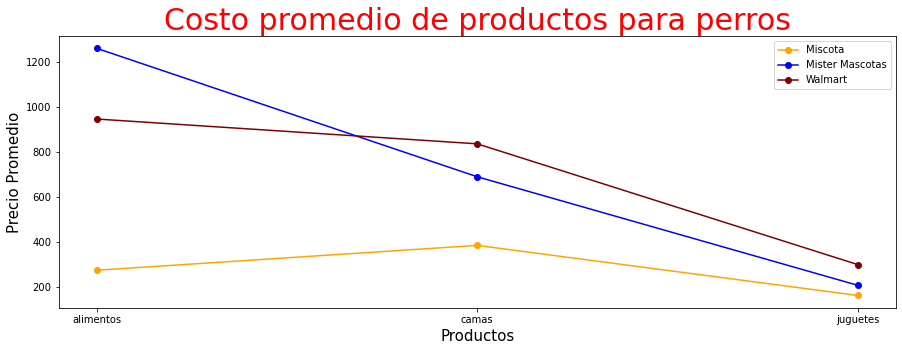

In [202]:
#GRÁFICA 1
#Consulta: #3.Consultar el costo promedio de todos los productos en cada autoservicio
fig, ax = plt.subplots()

fig.set_size_inches(15,5)
plt.title("Costo promedio de productos para perros",fontsize=30,color="red")
plt.xlabel("Productos",fontsize=15)
plt.ylabel("Precio Promedio",fontsize=15)

ax.plot(["alimentos","camas","juguetes"], 
                [275.197160, 385.375280, 163.600000],marker="o",markersize=6,color="orange",label="Miscota")

ax.plot(["alimentos","camas","juguetes"], 
                [1258.328767, 689.457143, 208.677419],marker="o",markersize=6,color="blue",label="Mister Mascotas")

ax.plot(["alimentos","camas","juguetes"], 
                [945.208333, 835.389167, 300.439792],marker="o",markersize=6,color="maroon",label="Walmart")
plt.legend()

plt.show()

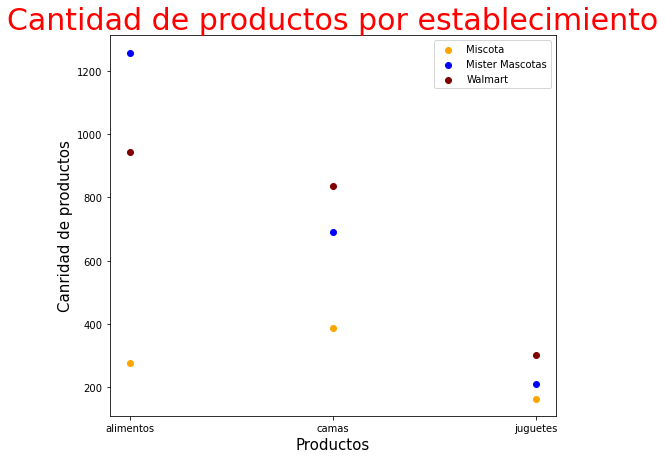

In [187]:
#GRÁFICA 2
#Consulta: 4.Consultar el número de productos que hay en cada autoservicio
fig, ax = plt.subplots()

fig.set_size_inches(8,7)

ax.scatter(["alimentos","camas","juguetes"],
           [275.197160,385.375280,163.600000],color="orange",label="Miscota")

ax.scatter(["alimentos","camas","juguetes"],
           [1258.328767,689.457143,208.677419],color="blue",label="Mister Mascotas")

ax.scatter(["alimentos","camas","juguetes"],
           [945.208333,835.389167,300.439792],color="maroon",label="Walmart")

plt.xlabel("Productos",fontsize=15)
plt.ylabel("Cantidad de productos",fontsize=15)

plt.title("Cantidad de productos por establecimiento",fontsize=30, color="red")
plt.legend()

plt.show()

In [221]:
#11.Consulta de los precios de todos los alimentos en Mister Mascotas
consulta_11=ps.sqldf(
"select Precios_de_lista from df_completo where Autoservicio='Mister Mascotas'")

consulta_11

,Precios_de_lista
0,1949.0
1,1997.0
2,1629.0
3,1429.0
4,1429.0
...,...
151,249.0
152,349.0
153,179.0
154,289.0


In [222]:
array_Mister_mascotas=np.array(consulta_11)
array_Mister_mascotas

array([[1949.],
       [1997.],
       [1629.],
       [1429.],
       [1429.],
       [1359.],
       [ 619.],
       [2349.],
       [ 697.],
       [1479.],
       [1719.],
       [1177.],
       [2047.],
       [ 249.],
       [1429.],
       [ 909.],
       [1249.],
       [1439.],
       [1699.],
       [ 249.],
       [ 219.],
       [ 329.],
       [1469.],
       [  nan],
       [  nan],
       [ 939.],
       [1559.],
       [2185.],
       [  nan],
       [2185.],
       [2047.],
       [ 869.],
       [ 389.],
       [ 379.],
       [ 799.],
       [ 329.],
       [2159.],
       [1439.],
       [  89.],
       [2199.],
       [1489.],
       [ 869.],
       [ 819.],
       [  nan],
       [1159.],
       [1219.],
       [1339.],
       [ 429.],
       [ 339.],
       [ 845.],
       [2047.],
       [ 139.],
       [ 948.],
       [  nan],
       [ 845.],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [ 619.],
       [ 339.],
       [1959.],
       [

In [223]:
#12.Consulta de los precios de todos los alimentos en Miscota
consulta_12=ps.sqldf(
"select Precios_de_lista from df_completo where Autoservicio='Miscota'")

consulta_12

,Precios_de_lista
0,380.0
1,309.0
2,142.0
3,47.0
4,380.0
...,...
70,95.0
71,145.0
72,45.0
73,216.0


In [224]:
array_Miscota=np.array(consulta_12)
array_Miscota

array([[380.   ],
       [309.   ],
       [142.   ],
       [ 47.   ],
       [380.   ],
       [332.   ],
       [ 47.   ],
       [ 47.   ],
       [417.   ],
       [268.   ],
       [380.   ],
       [663.   ],
       [356.   ],
       [315.   ],
       [356.   ],
       [816.   ],
       [428.   ],
       [166.   ],
       [  1.28 ],
       [369.   ],
       [  1.395],
       [  1.42 ],
       [655.   ],
       [  1.205],
       [  1.629],
       [  1.261],
       [267.   ],
       [700.   ],
       [994.   ],
       [195.   ],
       [  1.521],
       [721.   ],
       [  1.6  ],
       [187.   ],
       [187.   ],
       [273.   ],
       [841.   ],
       [358.   ],
       [501.   ],
       [300.   ],
       [466.   ],
       [361.   ],
       [756.   ],
       [160.   ],
       [255.   ],
       [421.   ],
       [172.   ],
       [700.   ],
       [680.   ],
       [135.   ],
       [140.   ],
       [137.   ],
       [147.   ],
       [174.   ],
       [170.   ],
       [19

In [225]:
#13.Consulta de los precios de todos los alimentos en Walmart
consulta_13=ps.sqldf(
"select Precios_de_lista from df_completo where Autoservicio='Walmart'")

consulta_13

,Precios_de_lista
0,669.00
1,559.00
2,189.00
3,959.00
4,959.00
...,...
139,202.70
140,452.09
141,349.29
142,624.99


In [226]:
array_Walmart=np.array(consulta_13)
array_Walmart

array([[ 669.  ],
       [ 559.  ],
       [ 189.  ],
       [ 959.  ],
       [ 959.  ],
       [1025.  ],
       [1299.2 ],
       [ 710.21],
       [ 970.  ],
       [1199.  ],
       [ 985.  ],
       [1069.  ],
       [ 840.  ],
       [ 825.  ],
       [ 135.  ],
       [1449.28],
       [ 901.83],
       [ 612.5 ],
       [ 609.  ],
       [1670.84],
       [ 351.14],
       [1021.2 ],
       [ 393.08],
       [1819.27],
       [ 990.  ],
       [2264.36],
       [ 958.83],
       [ 640.  ],
       [ 837.  ],
       [ 711.  ],
       [ 658.75],
       [ 513.  ],
       [ 280.  ],
       [1168.56],
       [1337.43],
       [1242.78],
       [1337.43],
       [ 299.  ],
       [ 220.22],
       [ 341.99],
       [ 333.99],
       [ 378.35],
       [2012.87],
       [ 665.  ],
       [ 172.  ],
       [ 369.  ],
       [ 939.  ],
       [ 207.57],
       [2490.  ],
       [2490.  ],
       [1199.  ],
       [ 669.  ],
       [ 229.  ],
       [ 369.  ],
       [2499.  ],
       [24

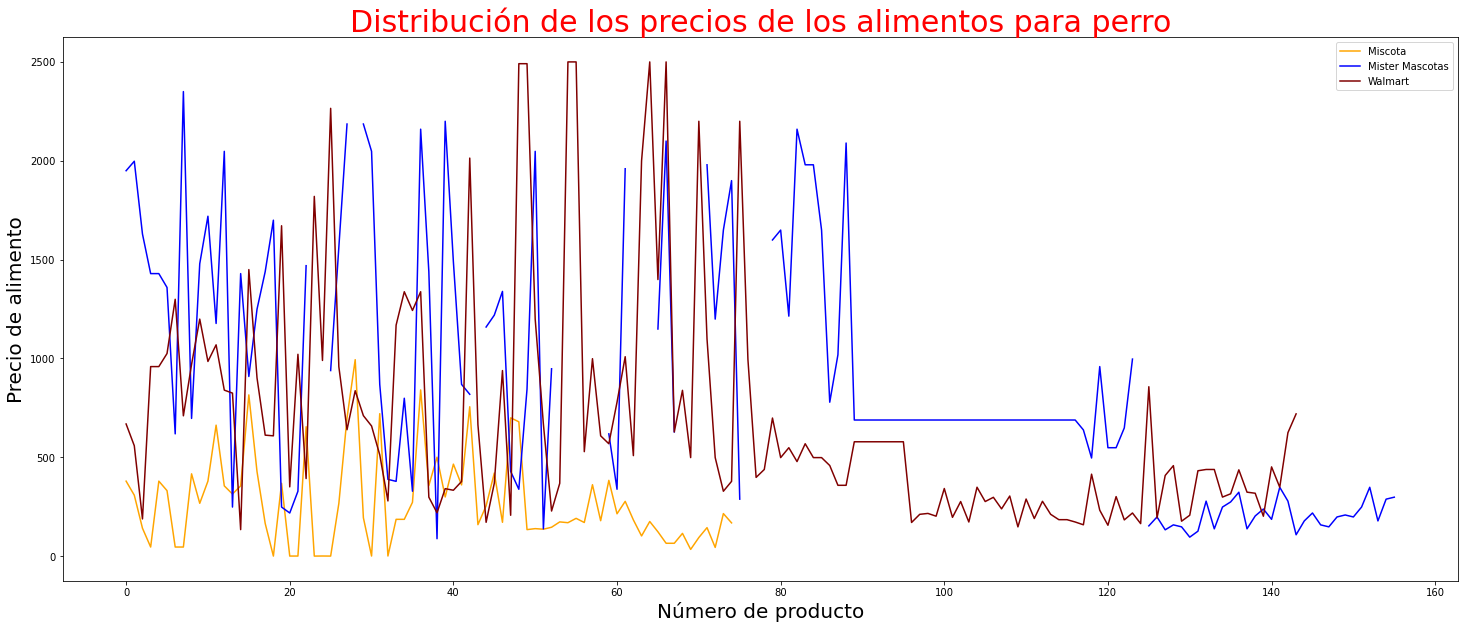

In [238]:
#GRÁFICA 3
#Consultas: 11,12,13
fig, ax = plt.subplots()

fig.set_size_inches(25,10)

ax.plot(array_Miscota,color="orange",label="Miscota")
ax.plot(array_Mister_mascotas, color="blue",label="Mister Mascotas")
ax.plot(array_Walmart,color="maroon",label="Walmart")

plt.xlabel("Número de producto",fontsize=20)
plt.ylabel("Precio de alimento",fontsize=20)

plt.title("Distribución de los precios de los alimentos para perro",fontsize=30, color="red")
plt.legend()

plt.show()